In [60]:
import numpy as numpy
import pandas  as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [61]:
df=pd.read_csv('fraudTrain.csv')

df.head()
df.shape
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [62]:
df.info()
df.drop('Unnamed: 0',axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [63]:
from sklearn.preprocessing import OrdinalEncoder
# for feat in cat_feat:
#     ord1 = OrdinalEncoder()

#     ord1.fit([df['category']])
#     # transforming the column after fitting
#     df["category"]= ord1.fit_transform(df[['category']])



In [64]:
df['category']

0               misc_net
1            grocery_pos
2          entertainment
3          gas_transport
4               misc_pos
               ...      
1296670    entertainment
1296671      food_dining
1296672      food_dining
1296673      food_dining
1296674      food_dining
Name: category, Length: 1296675, dtype: object

In [65]:
df['merchant'].value_counts()#693 categories
df['category'].value_counts()
df['first'].value_counts()#341
df['trans_num'].value_counts()#555719
df['job'].value_counts()#478
df['dob'].value_counts()#910

1977-03-23    5636
1981-08-29    4636
1988-09-15    4623
1955-05-06    3661
1995-07-12    3123
              ... 
1944-06-17       7
1970-06-25       7
1962-03-14       7
1960-10-28       7
1999-10-26       7
Name: dob, Length: 968, dtype: int64

In [66]:
cat_feat=[feat for feat in df.columns if df[feat].dtypes=='object' and feat!='trans_date_trans_time' ]
num_feat=[feat for feat in df.columns if df[feat].dtype=='int64' or 'float64' and feat!='trans_date_trans_time' ]
cat_feat.append('cc_num')
cat_feat.append('unix_time')

In [67]:
from sklearn.preprocessing import OrdinalEncoder
for feat in cat_feat:
    ord1 = OrdinalEncoder()
    ord1.fit([df[feat]])
    # transforming the column after fitting
    df[feat]= ord1.fit_transform(df[[feat]])

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,444.0,514.0,8.0,4.97,162.0,18.0,0.0,568.0,526.0,...,36.0788,-81.1781,3495,370.0,779.0,56438.0,0.0,36.011293,-82.048315,0
1,2019-01-01 00:00:44,42.0,241.0,4.0,107.23,309.0,157.0,0.0,435.0,612.0,...,48.8878,-118.2105,149,428.0,607.0,159395.0,1.0,49.159047,-118.186462,0
2,2019-01-01 00:00:51,237.0,390.0,0.0,220.11,115.0,381.0,1.0,602.0,468.0,...,42.1808,-112.2620,4154,307.0,302.0,818703.0,2.0,43.150704,-112.154481,0
3,2019-01-01 00:01:16,509.0,360.0,2.0,45.00,163.0,463.0,1.0,930.0,84.0,...,46.2306,-112.1138,1939,328.0,397.0,544575.0,3.0,47.034331,-112.561071,0
4,2019-01-01 00:03:06,368.0,297.0,9.0,41.96,336.0,149.0,1.0,418.0,216.0,...,38.4207,-79.4629,99,116.0,734.0,831111.0,4.0,38.674999,-78.632459,0


In [ ]:
from datetime import datetime as dt
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["trans_date"] = df["trans_date_trans_time"].dt.date
df["trans_date"]= pd.to_datetime(df["trans_date"])

df['year'] = df['trans_date'].dt.year
df['month'] = df['trans_date'].dt.month
df['day'] = df['trans_date'].dt.day

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,year,month,day
0,2019-01-01 00:00:18,444.0,514.0,8.0,4.97,162.0,18.0,0.0,568.0,526.0,...,779.0,56438.0,0.0,36.011293,-82.048315,0,2019-01-01,2019,1,1
1,2019-01-01 00:00:44,42.0,241.0,4.0,107.23,309.0,157.0,0.0,435.0,612.0,...,607.0,159395.0,1.0,49.159047,-118.186462,0,2019-01-01,2019,1,1
2,2019-01-01 00:00:51,237.0,390.0,0.0,220.11,115.0,381.0,1.0,602.0,468.0,...,302.0,818703.0,2.0,43.150704,-112.154481,0,2019-01-01,2019,1,1
3,2019-01-01 00:01:16,509.0,360.0,2.0,45.00,163.0,463.0,1.0,930.0,84.0,...,397.0,544575.0,3.0,47.034331,-112.561071,0,2019-01-01,2019,1,1
4,2019-01-01 00:03:06,368.0,297.0,9.0,41.96,336.0,149.0,1.0,418.0,216.0,...,734.0,831111.0,4.0,38.674999,-78.632459,0,2019-01-01,2019,1,1


In [ ]:
df.drop(columns=['trans_date_trans_time'],axis=1,inplace=True)
df.head()


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,year,month,day
0,444.0,514.0,8.0,4.97,162.0,18.0,0.0,568.0,526.0,27.0,...,779.0,56438.0,0.0,36.011293,-82.048315,0,2019-01-01,2019,1,1
1,42.0,241.0,4.0,107.23,309.0,157.0,0.0,435.0,612.0,47.0,...,607.0,159395.0,1.0,49.159047,-118.186462,0,2019-01-01,2019,1,1
2,237.0,390.0,0.0,220.11,115.0,381.0,1.0,602.0,468.0,13.0,...,302.0,818703.0,2.0,43.150704,-112.154481,0,2019-01-01,2019,1,1
3,509.0,360.0,2.0,45.00,163.0,463.0,1.0,930.0,84.0,26.0,...,397.0,544575.0,3.0,47.034331,-112.561071,0,2019-01-01,2019,1,1
4,368.0,297.0,9.0,41.96,336.0,149.0,1.0,418.0,216.0,45.0,...,734.0,831111.0,4.0,38.674999,-78.632459,0,2019-01-01,2019,1,1


In [ ]:
# df.columns
# df.drop('trans_date_trans_time',axis=1,inplace=True)

<AxesSubplot:xlabel='last', ylabel='Density'>

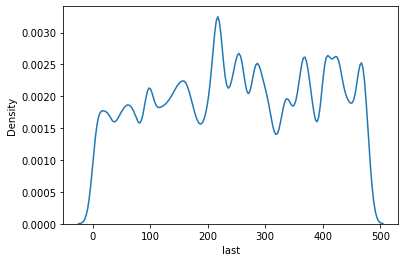

In [ ]:
sns.kdeplot(df["last"]) 

#cc_num, zip, unix_time, merch_lat, is_fraud

<AxesSubplot:xlabel='last', ylabel='Density'>

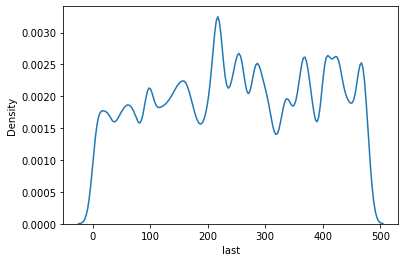

In [ ]:

df["cc_num"]=numpy.log1p(df["cc_num"])
df["zip"]=numpy.log1p(df["zip"])
df["unix_time"]=numpy.log1p(df["unix_time"])
df["merch_lat"]=numpy.log1p(df["merch_lat"])
df["is_fraud"]=numpy.log1p(df["is_fraud"])

sns.kdeplot(df["last"]) 



In [ ]:
num_feat

['cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

<AxesSubplot:>

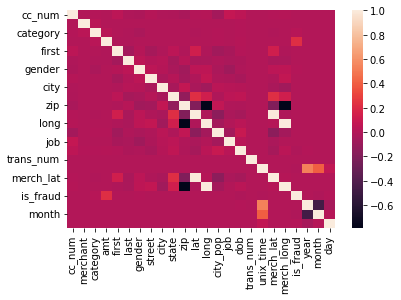

In [ ]:
sns.heatmap(df.corr())

In [ ]:
#Variance Threshold is a feature selector that removes all the low variance features from the dataset that are of no great use in modeling.
#in our case, variance threshold was not a great indicator for feature selection

# list=[]
# for feat in x.columns:
#     list.append(x[feat].std()**(1/2))#column variance is added
# list=pd.DataFrame(list) 
#  thres=list.mean()
# from sklearn.feature_selection import VarianceThreshold
# var_thres=VarianceThreshold(threshold=8.721515)
# var_thres.fit(x)
# var_thres.get_support()#coulmns greater than threshold
# x.columns[var_thres.get_support()]
# print(thres)


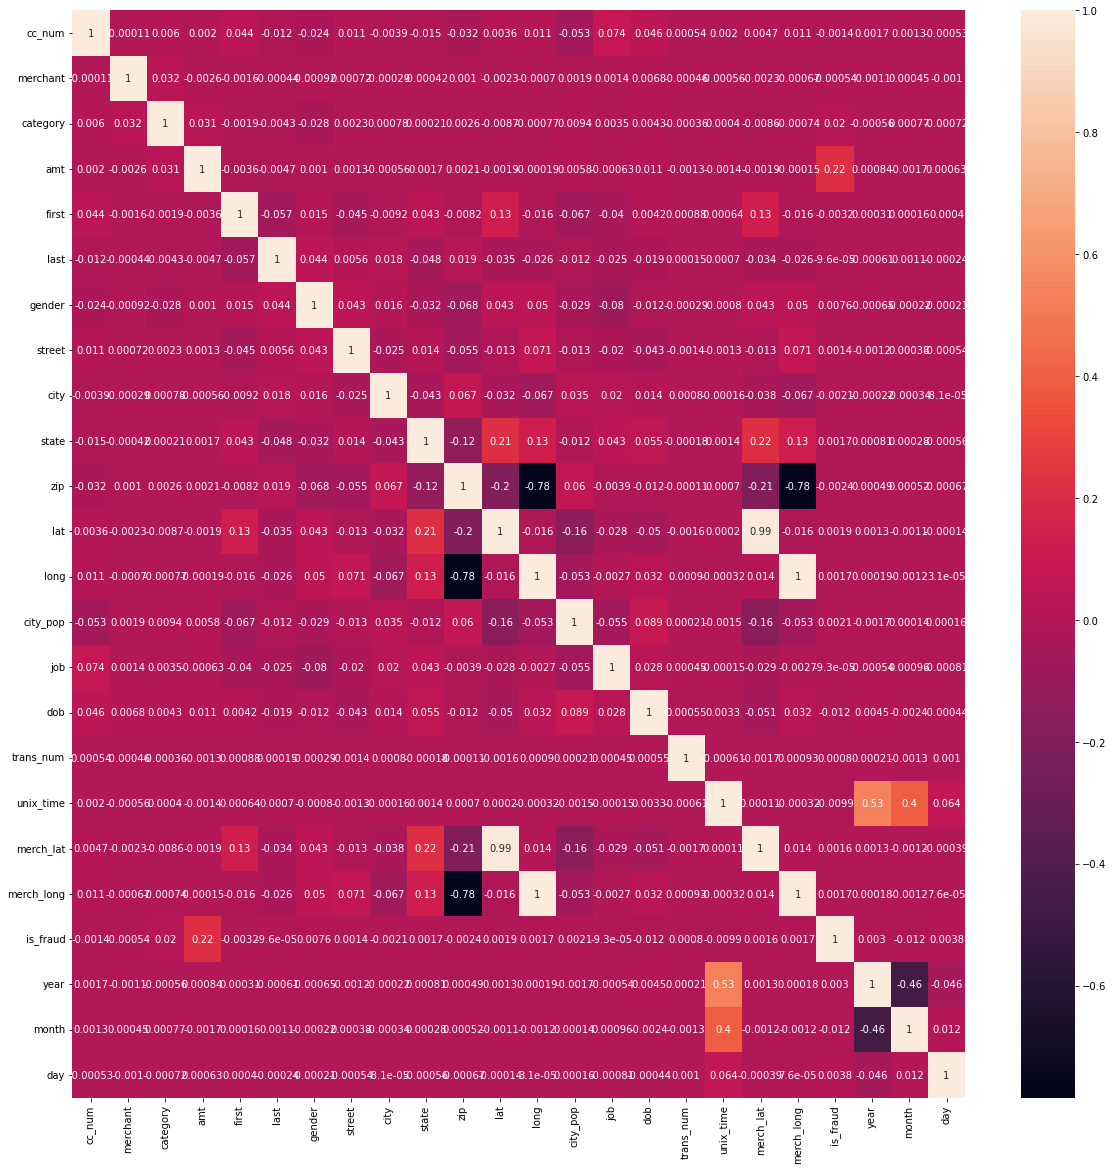

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt #seaborn
new=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(new,annot=True) #Heatmap of the data
plt.show()


In [ ]:
df.head()
df.drop(columns=[ 'trans_date'],axis=1,inplace=True)

In [ ]:
data2=df.copy()
x2=data2.drop('is_fraud',axis=1)

y2=data2['is_fraud']
# to check which features are above threshold = is mean of all the column variance
new['is_fraud']=abs(new['is_fraud'])#pearson correlation feature selection
mean1=new['is_fraud'].mean()
mean1 #mean of correlation between is_fraud and every other feature
print(mean1)
remove1=[]
for feat in x2.columns:
    if new["is_fraud"][feat]<0.05653549265840602:# ->mean value
        remove1.append(feat)

remove1.remove('lat')
remove1.remove('year')
remove1.remove('month')
remove1.remove('day')

for feat in remove1:
    x2.drop(feat,axis=1,inplace=True)


0.054646958636192594


In [ ]:
# the columns that are remaining after feature selection using pearson correlation
x2.columns
y2.shape

(1296675,)

In [ ]:
x2.columns

Index(['amt', 'lat', 'year', 'month', 'day'], dtype='object')

In [ ]:
# x2.drop(columns=[ 'merch_lat','merch_long'],axis=1,inplace=True)

In [ ]:
y2.value_counts()
for i in range (0,1289475):
    if y2[i]>=0.5:
        y2[i]==1
y2.value_counts()

0.000000    1289169
0.693147       7506
Name: is_fraud, dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y2)
encoded=pd.DataFrame(encoded)
encoded.value_counts()

0    1289169
1       7506
dtype: int64

In [ ]:
# from collections import Counter #printing the label distribution
# Counter(y)
# under_sampling.__version__

In [ ]:
#Undersampling: a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class
# from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# undersample = RandomUnderSampler(sampling_strategy=0.4) 
# x_over, y_over = undersample.fit_resample(x, y)
# print(Counter(y_over))

In [ ]:
#training the model
from sklearn.model_selection import train_test_split  #splitting the dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x2, encoded, test_size = 0.30, random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler   #to standardize our data
st_x = StandardScaler()    
xtrain = st_x.fit_transform(xtrain)    
xtest = st_x.transform(xtest)  

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
print ("Accuracy Logistic Regression : ", accuracy_score(ytest, y_pred))
roc_curve(ytest,y_pred)#false positive probability is almost less than 0.5 so undersampling will not effect the results
#The ROC curve is produced by calculating and plotting the true positive rate against the false positive rate for a single classifier at a variety of thresholds.

Accuracy Logistic Regression :  0.9936375812011733


(array([0.00000000e+00, 5.14574881e-04, 1.00000000e+00]),
 array([0., 0., 1.]),
 array([2, 1, 0]))

Logistic Regression Confusion Matrix: 
 [[386528    199]
 [  2276      0]]


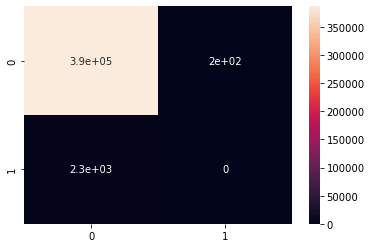

In [ ]:
#A confusion matrix is a table that is often used to describe the performance of a classifier on a set of test data for which the true values are known
from sklearn.metrics import confusion_matrix  
LRcm = confusion_matrix(ytest, y_pred) 
sns.heatmap(LRcm, annot=True)
print("Logistic Regression Confusion Matrix: \n", LRcm)

In [ ]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=2)
knnclf.fit(xtrain,ytrain)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [ ]:
ypred = knnclf.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

print ("Accuracy KNN : ", accuracy_score(ytest, ypred))
roc_curve(ytest,ypred)

Accuracy KNN :  0.9946247201178398


(array([0.        , 0.00114034, 1.        ]),
 array([0.        , 0.27504394, 1.        ]),
 array([2, 1, 0]))

K Nearest Neighbors Confusion Matrix: 
 [[386286    441]
 [  1650    626]]


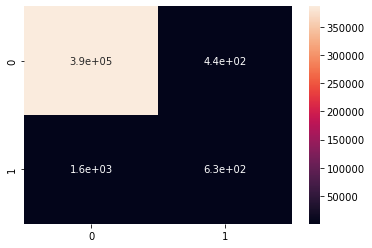

In [ ]:
from sklearn.metrics import confusion_matrix  
KNNcm = confusion_matrix(ytest, ypred) 
sns.heatmap(KNNcm, annot=True)
print("K Nearest Neighbors Confusion Matrix: \n", KNNcm)

In [ ]:
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf.fit(xtrain,ytrain)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
pred = nbclf.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy Naive Bayes : ", accuracy_score(ytest, pred))
roc_curve(ytest,pred)

Accuracy Naive Bayes :  0.9915296283062084


(array([0.    , 0.0055, 1.    ]),
 array([0.        , 0.48681898, 1.        ]),
 array([2, 1, 0]))

Naive Bayes Confusion Matrix: 
 [[384600   2127]
 [  1168   1108]]


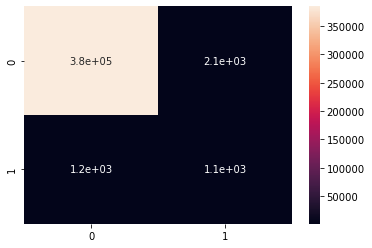

In [ ]:
from sklearn.metrics import confusion_matrix  
NBcm = confusion_matrix(ytest, pred) 
sns.heatmap(NBcm, annot=True)
print("Naive Bayes Confusion Matrix: \n", NBcm)

In [ ]:
# pr=svm.predict(xtest)

In [ ]:
# from sklearn.metrics import accuracy_score
# print ("Accuracy SVM: ", accuracy_score(ytest, pr))

In [ ]:
# from sklearn.metrics import confusion_matrix  
# SVMcm= confusion_matrix(ytest, pr) 
# print("Support Vector Classifier Confusion Matrix: \n", SVMcm)

In [ ]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier( criterion = 'entropy')
DT.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_yhat = DT.predict(xtest)

Decision Trees Confusion Matrix: 
 [[385057   1670]
 [  1422    854]]


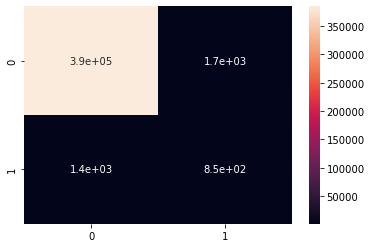

In [ ]:
from sklearn.metrics import confusion_matrix  
DTcm= confusion_matrix(ytest, dt_yhat) 
sns.heatmap(DTcm, annot=True)
print("Decision Trees Confusion Matrix: \n", DTcm)

In [ ]:
#Random Forest
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5)
rf.fit(xtrain, ytrain)
rf_yhat = rf.predict(xtest)

/var/folders/qj/2h69_zxd69ddxf3bk5777k080000gn/T/ipykernel_2591/334420849.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain, ytrain)


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy Random Forest: ", accuracy_score(ytest,rf_yhat))

Accuracy Random Forest:  0.9951542790158431


Random Forest Confusion Matrix: 
 [[386239    488]
 [  1397    879]]


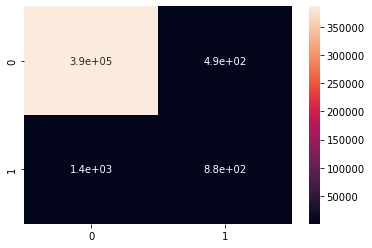

In [ ]:
from sklearn.metrics import confusion_matrix  
RFcm= confusion_matrix(ytest, rf_yhat) 
sns.heatmap(RFcm, annot=True)
print("Random Forest Confusion Matrix: \n", RFcm)

In [ ]:
#comparing all the accuracies of our classifiers
print ("Accuracy Logistic Regression : ", accuracy_score(ytest, y_pred))
print ("Accuracy K Nearest Neighbor: ", accuracy_score(ytest, ypred))
print ("Accuracy Naive Bayes : ", accuracy_score(ytest, pred))
# print ("Accuracy Support Vector Machine: ", accuracy_score(ytest, pred))
print ("Accuracy Decision Trees : ", accuracy_score(ytest,dt_yhat))
print ("Accuracy Random Forest : ", accuracy_score(ytest,rf_yhat))

Accuracy Logistic Regression :  0.9936375812011733
Accuracy K Nearest Neighbor:  0.9946247201178398
Accuracy Naive Bayes :  0.9915296283062084
Accuracy Decision Trees :  0.9920514751814253
Accuracy Random Forest :  0.9951542790158431


In [ ]:
#the F1-score is a measure of a test's accuracy
from sklearn.metrics import f1_score
print('F1 score of the Logistic Regression model is {}'.format(f1_score(ytest,y_pred )))
print('F1 score of the K Nearest Neighbor model is {}'.format(f1_score(ytest,ypred )))
print('F1 score of the Naive Bayes model is {}'.format(f1_score(ytest, pred)))
# print('F1 score of the Support Vector Machine model is {}'.format(f1_score(ytest,pred)))
print('F1 score of the Decision Trees model is {}'.format(f1_score(ytest,dt_yhat )))
print('F1 score of the Random Forest model is {}'.format(f1_score(ytest,rf_yhat )))

F1 score of the Logistic Regression model is 0.0
F1 score of the K Nearest Neighbor model is 0.3745139096619802
F1 score of the Naive Bayes model is 0.4021048811467973
F1 score of the Decision Trees model is 0.3558333333333333
F1 score of the Random Forest model is 0.48256931100741146


In [ ]:
#That k-fold cross validation is a procedure used to estimate the skill of the model on new data. 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold =KFold(n_splits=10)

In [ ]:
algos = ["Decision Tree","Logistic Regression","K Nearest Neighbor","Naive Bayes","RandomForestClassifier"]
clfs = [DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),naive_bayes.GaussianNB(),RandomForestClassifier]
cv_results=[]
for classifiers in clfs:
    cv_score = cross_val_score(classifier,xtest,ytest,cv=10,scoring="accuracy")
    cv_results.append(cv_score.mean())
cv_mean = pd.DataFrame(cv_results,index=algos)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)#checking for overfitting data since we got same accuracy for all algorithms we can tell with f1 score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Accuracy
Decision Tree,0.993509
Logistic Regression,0.993509
K Nearest Neighbor,0.993509
Naive Bayes,0.993509
RandomForestClassifier,0.993509


In [ ]:
from tkinter import *

In [ ]:
amt = 0

#create a window

window = Tk()
window.geometry("1000x800")
window.config(bg = "#E6E6FA")
window.resizable(width=TRUE,height=True)
window.title("CC Fraud Detection")

 
def OpenNew(q1 , q2, q3 , q4,q5):
    newWindow = Toplevel(window)
    newWindow.title("Detection Result")
    newWindow.geometry("600x300")
    newWindow.config(bg = "#E6E6FA")
    Label(newWindow,
          text ="This is The Result",font=("Arial", 20, "normal", "italic"),fg = "Black", bg="#E6E6FA",).pack()
    
   # Label(newWindow,
    #      text ="This is The Result of logistic regression model : "+str(q1),font=("Arial", 12, "normal", "italic"),fg = "Black", bg="#E6E6FA" ).pack()
    
   # Label(newWindow,
   #       text ="This is The Result of knn classifier : "+str(q2),font=("Arial", 12, "normal", "italic"),fg = "Black", bg="#E6E6FA" ).pack()
    
    Label(newWindow,
          text ="This is The Result of naive baiyes classifier : "+str(q3),font=("Arial", 12, "normal", "italic"),fg = "Black", bg="#E6E6FA" ).pack()
    
   # Label(newWindow,text ="This is The Result of decision tree classifier : "+str(q4),font=("Arial", 12, "normal", "italic"),fg = "Black", bg="#E6E6FA" ).pack()
    
   # Label(newWindow,text ="This is The Result of random forest classifier: "+str(q5),font=("Arial", 12, "normal", "italic"),fg = "Black", bg="#E6E6FA" ).pack()
    Label(newWindow,text ="'1':- Indiacate Fraud ,'0':-Indiacate Novel",font=("Arial", 20, "bold", "italic"),fg = "Black", bg="#E6E6FA" ).pack()
    

def play_game():
    global RETRIES
 
    choice = int(number_form.get())
    amt   = choice
    lat  = float(gender_form.get())
    year = int(name_form.get())
    month = int(CC_Num_form.get())
    day = int(day_form.get())
    # name=str(input('enter your name'))
    # age=int(input('enter your age'))
    # gender=str(input('enter your gender'))
    y_p1=classifier.predict([[amt,lat,year,month,day]])
    y_p2=knnclf.predict([[amt,lat,year,month,day]])
    y_p3=nbclf.predict([[amt,lat,year,month,day]])
    y_p4=DT.predict([[amt,lat,year,month,day]])
    y_p5=rf.predict([[amt,lat,year,month,day]])
    OpenNew(y_p1,y_p2,y_p3,y_p4,y_p5)

 

 

guessed_number = StringVar()
number_form = Entry(window,font=("Arial",14),textvariable=guessed_number)
cc_num = StringVar()
CC_Num_form = Entry(window,font=("Arial",14),textvariable=cc_num)
name = StringVar()
name_form =Entry(window,font=("Arial",14),textvariable=name)
gender =StringVar()
gender_form = Entry(window,font=("Arial",14),textvariable=gender)
day = StringVar()
day_form = Entry(window,font=("Arial",14),textvariable=day)
g=  Label(window,text = "Year:",fg="black",bg="#E6E6FA")
v=Label(window,text = "Location:",fg="black",bg="#E6E6FA")
s  = Label(window,text = "Month",fg="black",bg="#E6E6FA")
Day  = Label(window,text = "Day",fg="black",bg="#E6E6FA")
m =  Label(window,text = "Amount",fg="black",bg="#E6E6FA")
g.place(x=100,y= 150)
v.place(x=100,y= 250)
s.place(x=100,y= 350)
Day.place(x= 100 , y = 450)
m.place(x=100,y= 550)
name_form.place(x=250, y=150)
CC_Num_form.place(x=250,y= 250)
day_form.place(x= 250, y = 350)
gender_form.place(x=250,y= 450)
number_form.place(x=250, y=550)
exit_b = Button(window,text="EXIT",font=("Arial",14),fg="#b82741", bg="White",command=exit)
#exit_b.place(x=300,y=420)
title = Label(window,text="CC Fraud Detection",font=("Arial",24,"bold","italic"),fg="black",bg="#E6E6FA")
 
result = Label(window, text="Click To Detect Your Fraud Transaction", font=("Arial", 12, "normal", "italic"),fg = "Black", bg="#E6E6FA", justify= LEFT)
 
title.place(x=100, y=50)
result.place(x=100, y=610)
guess_b = Button(window,text="Check",font=("Arial",12), fg="#13d675",bg="Black",command=play_game)
guess_b.place(x=350,y = 650)
window.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/qj/2h69_zxd69ddxf3bk5777k080000gn/T/ipykernel_2591/1363349728.py", line 38, in play_game
    choice = int(number_form.get())
ValueError: invalid literal for int() with base 10: ''
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/qj/2h69_zxd69ddxf3bk5777k080000gn/T/ipykernel_2591/1363349728.py", line 41, in play_game
    year = int(name_form.get())
ValueError: invalid literal for int() with base 10: 'fdabf'
Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/qj/2h69_zxd69ddxf3bk5777k080000gn/T/ipykernel_2591/

KeyboardInterrupt: 